In [3]:
# TODO: Optimize MCMC code to run faster using parallelization or multithreading
# TODO: Add detailed docstrings to all functions and classes for better code documentation
# TODO: Implement unit tests
# TODO: Add more flexible parameter grid options for the models
# TODO: Investigate old code to understand why Spearman's rho used to be higher and orders were closer to the ideal order

import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

## SIGMOID demo

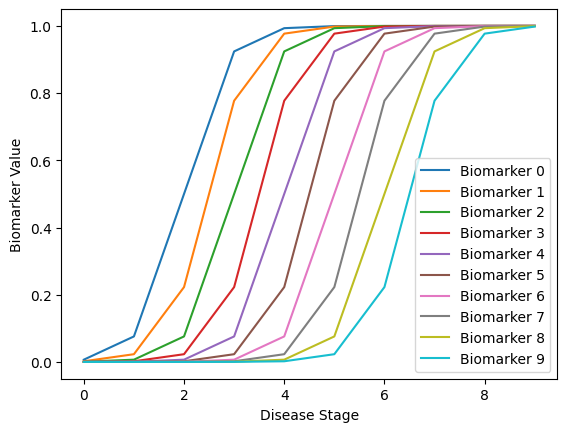

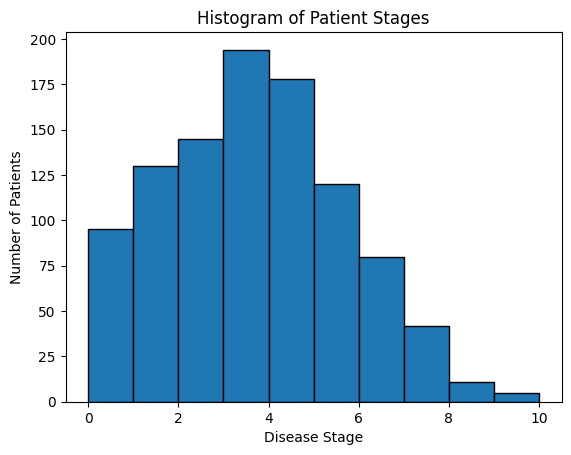

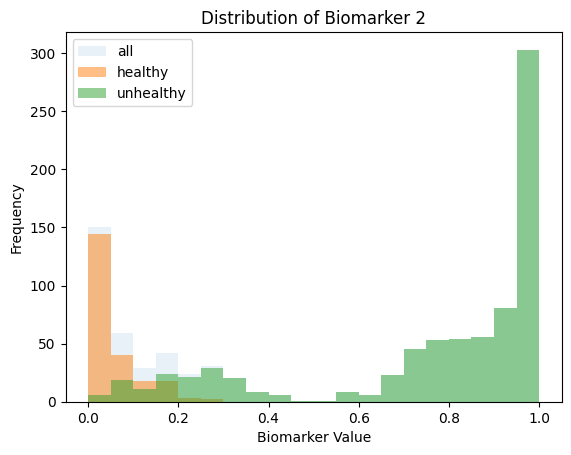

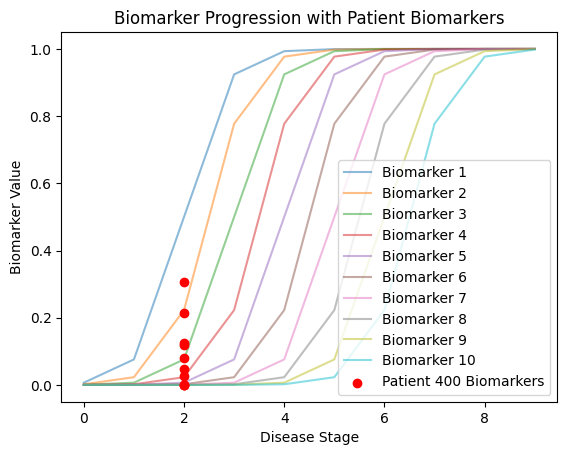

In [4]:
# model parameters
n_biomarkers = 10
n_stages = 10
model_type = 'sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 2.5, 'c': 2.0},
    1: {'s': 2.5, 'c': 2.5},
    2: {'s': 2.5, 'c': 3.0},
    3: {'s': 2.5, 'c': 3.5},
    4: {'s': 2.5, 'c': 4.0},
    5: {'s': 2.5, 'c': 4.5},
    6: {'s': 2.5, 'c': 5.0},
    7: {'s': 2.5, 'c': 5.5},
    8: {'s': 2.5, 'c': 6.0},
    9: {'s': 2.5, 'c': 6.5},
}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=True, noise_std=0.1, random_state=1, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
# TODO: set proper xlim based on number of stages 
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=1)
sample_generator.plot_patient_biomarkers(patient_index=400)

In [5]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 500000/500000 [02:21<00:00, 3538.30it/s]

Spearman's rho values: -0.28484848484848485
First 10 MCMC sampled orders: [array([3, 4, 5, 6, 7, 8, 9, 1, 2, 0]), array([3, 4, 5, 6, 7, 8, 9, 0, 2, 1]), array([3, 4, 5, 6, 7, 8, 9, 0, 1, 2]), array([3, 4, 5, 6, 7, 8, 9, 2, 1, 0]), array([3, 4, 5, 6, 7, 8, 9, 2, 0, 1]), array([3, 4, 5, 6, 7, 8, 9, 2, 1, 0]), array([3, 4, 5, 6, 7, 8, 9, 0, 1, 2]), array([3, 4, 5, 6, 7, 8, 9, 1, 0, 2]), array([3, 4, 5, 6, 7, 8, 9, 0, 1, 2]), array([3, 4, 5, 6, 7, 8, 9, 0, 2, 1])]


### TRANSITION MATRIX demo

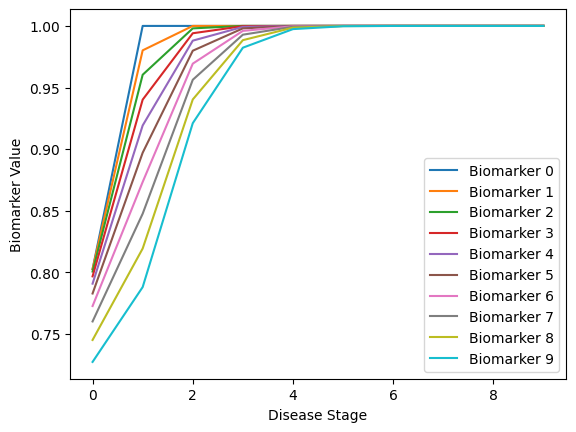

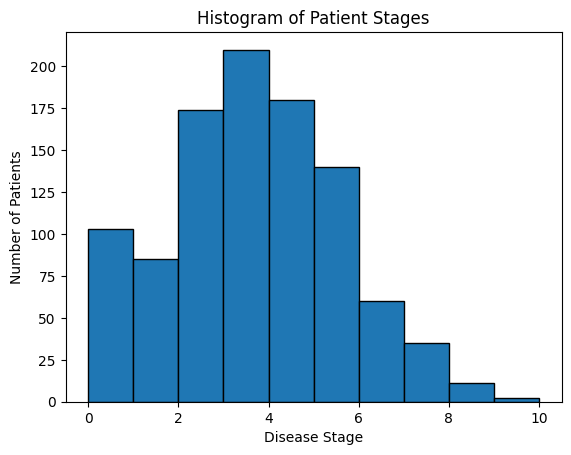

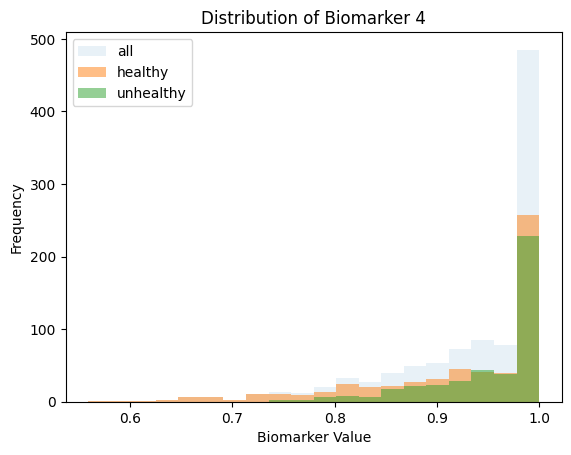

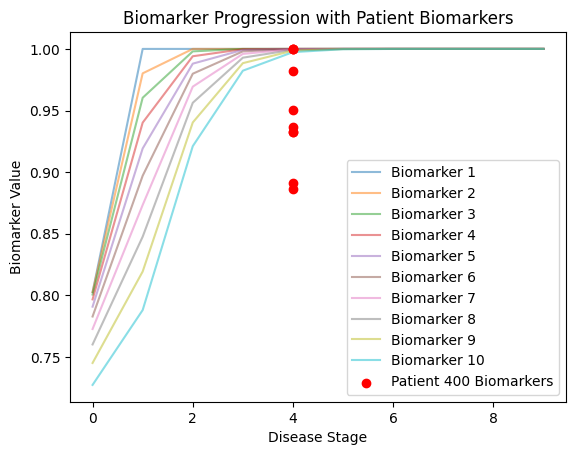

In [10]:
# model parameters
n_biomarkers = 10
n_stages = 10
model_type = 'transition_matrix'
biomarkers_params_transition = {'coeff': 1e-1}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_transition)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plotting methods
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index = 3, healthy_stage_threshold=3)
sample_generator.plot_patient_biomarkers(patient_index=400)


In [11]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 500000/500000 [02:21<00:00, 3544.63it/s]

Spearman's rho values: -0.8666666666666665
First 10 MCMC sampled orders: [array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1]), array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1]), array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1]), array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1]), array([7, 8, 9, 6, 4, 5, 3, 0, 2, 1]), array([7, 8, 9, 6, 5, 4, 3, 0, 2, 1])]


## ODE demo

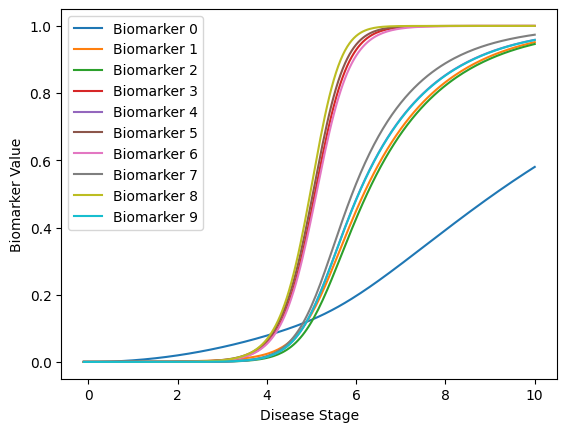

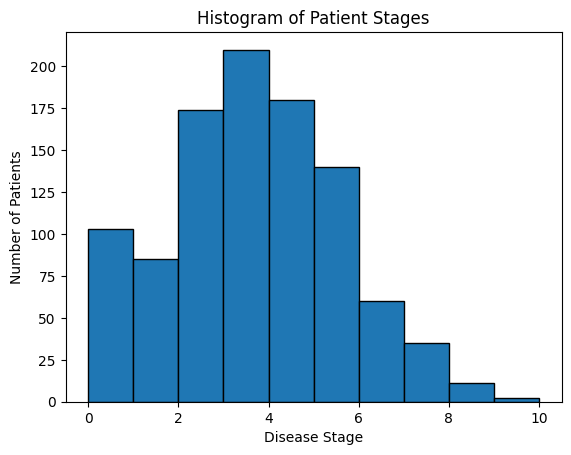

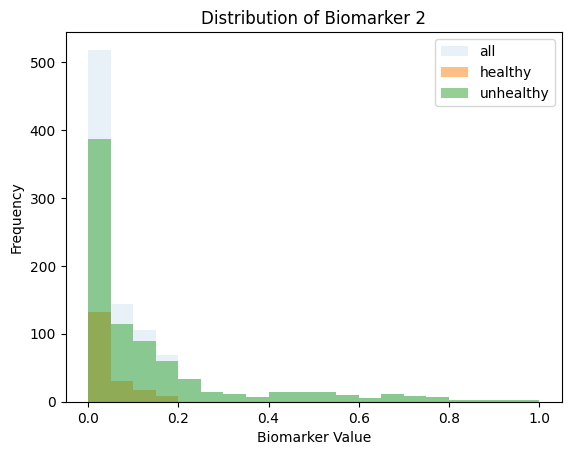

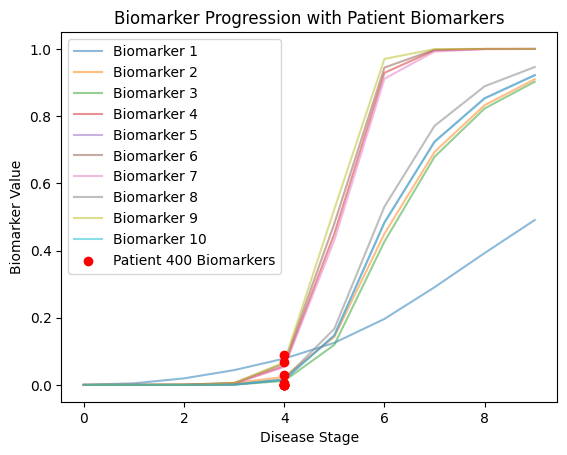

In [12]:
# TODO: add param grid options
# model parameters
n_biomarkers = 10
n_stages = 10
model_type = 'ode'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=1)
sample_generator.plot_patient_biomarkers(patient_index=400)

In [13]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

# print orders
analyzer.print_orders()

100%|██████████| 500000/500000 [02:22<00:00, 3514.77it/s]

Spearman's rho values: -0.41818181818181815
First 10 MCMC sampled orders: [array([8, 5, 6, 3, 4, 2, 7, 9, 1, 0]), array([8, 5, 3, 6, 4, 2, 7, 9, 1, 0]), array([8, 5, 3, 6, 4, 2, 7, 1, 9, 0]), array([8, 5, 6, 3, 4, 2, 7, 1, 9, 0]), array([8, 5, 6, 3, 4, 2, 9, 1, 7, 0]), array([8, 5, 6, 3, 4, 2, 1, 9, 7, 0]), array([8, 5, 6, 3, 4, 2, 9, 1, 7, 0]), array([8, 5, 6, 3, 4, 2, 7, 1, 9, 0]), array([8, 5, 6, 3, 4, 7, 2, 1, 9, 0]), array([8, 5, 3, 6, 4, 7, 2, 1, 9, 0])]
